# Financial Derivatives
A derivative is a financial instrument whose value is derived from an underlying asset (e.g., stocks, bonds, commodities, or interest rates).

### Types of Derivatives:

- **Options**: Contracts giving the holder the right, but not the obligation, to buy or sell an asset at a specific price within a specific timeframe.

- **Futures**: Contracts obligating the buyer to purchase (or seller to sell) an asset at a predetermined future date and price.

- **Swaps**: Contracts to exchange cash flows or financial instruments.

- **Forwards**: Customized contracts similar to futures but traded over-the-counter (OTC).

Applications:

- Hedging risk
- Speculation
- Arbitrage

### Objectives:

- Understand the fundamentals of derivatives and their types.

- Learn how to use Python to calculate basic derivative metrics.

- Apply knowledge to real-world financial scenarios.

In [1]:
import numpy as np #for numerical computation
import seaborn as sns #asthetic plots
import matplotlib as mpl #for plotting
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

# Value of an Option at maturity $T$,

## European Call Option Payoff
A European Call Option on a security with price $S_t$ with strike price $K$ with maturity $T$ has a payoff $h_T$ at expiry. The payoff can be given as ,
$$h_T = max\{S_T-K, 0\}$$
For a European call option on an index with strike 8,000 and index level of 8,200,at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or,USD) from the option writer. If the index level is below the strike, say at 7,800, the option, expires worthless and the writer does not have to pay anything.

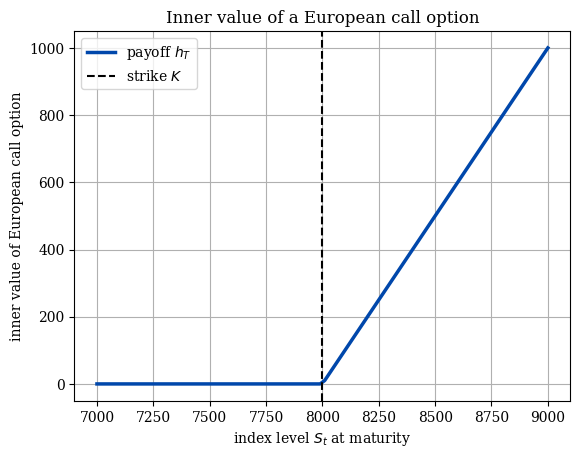

In [2]:
# Option Strike
K = 8000
# Underlying values
S = np.linspace(7000, 9000, 100)
# Values of call option
h = np.maximum(S - K, 0)
# Graphical Output
plt.figure()
plt.plot(S, h, lw=2.5, c='#0047AB', label='payoff $h_T$') # plot inner values at maturity
plt.axvline(K, c='k', ls='--', label='strike $K$') # plot strike price as a line
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.title('Inner value of a European call option')
plt.grid(True)
plt.legend();

## European Put Option Payoff
A European Put Option on a security with price  with strike price  and maturity  has a payoff  at expiry. The payoff can be given as:
$$h_T = max\{K-S_T, 0\}$$

For a European put option on an index with strike 8,000 and index level of 7,800 at maturity, the option holder receives the difference  (e.g., in EUR or USD) from the option writer. If the index level is above the strike, say at 8,200, the option expires worthless and the writer does not have to pay anything.

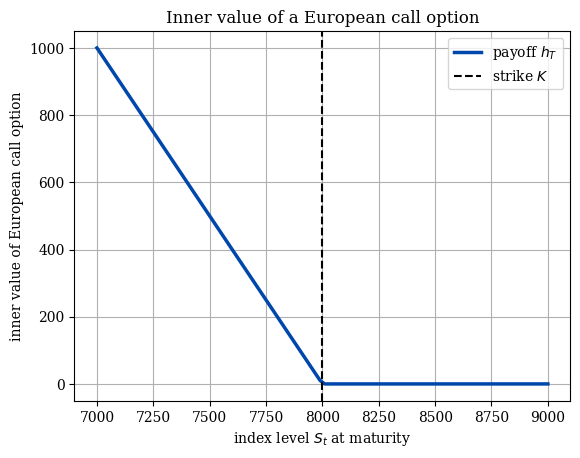

In [3]:
# Option Strike
K = 8000
# Underlying values
S = np.linspace(7000, 9000, 100)
# Values of call option
h = np.maximum(K-S, 0)
# Graphical Output
plt.figure()
plt.plot(S, h, lw=2.5, c='#0047AB', label='payoff $h_T$') # plot inner values at maturity
plt.axvline(K, c='k', ls='--', label='strike $K$') # plot strike price as a line
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.title('Inner value of a European call option')
plt.grid(True)
plt.legend();

# Black-Scholes Formula

The **Black-Scholes-Merton formula** is a mathematical model used for pricing European-style options. It helps determine the theoretical price of options by accounting for factors such as the underlying asset's price, time to expiration, volatility, and interest rates.

---

## The Formula

For a European call option, the price $C$ is given by:
$$C = S_0 N(d_1) - K e^{-rT} N(d_2)$$


For a European put option, the price $P$ is:
$$P = K e^{-rT} N(-d_2) - S_0 N(-d_1)$$

Where:
$$d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}}$$ \\
$$d_2 = d_1 - \sigma \sqrt{T}$$

---

## Variables

- $S_0$: Current price of the underlying asset
- $K$: Strike price of the option
- $T$: Time to expiration (in years)
- $r$: Risk-free interest rate (annualized)
- $\sigma$: Volatility of the underlying asset (standard deviation of its returns)
- $N(d)$: Cumulative distribution function (CDF) of the standard normal distribution i.e.
$$N(d) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{d} e^{-\frac{t^2}{2}}$$

In [16]:
import math # for math functions
from scipy.integrate import quad # compute a definite integral.

# HELPER FUNCTIONS

# PDF of Normal Distribution
def dN(x:float)->float:
    """Probability density function of standard normal random variable x."""
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

# CDF of Normal Distribution
def N(d:float)->float:
    """ Cumulative density function of standard normal random variable x."""
    return quad(lambda x: dN(x), -math.inf, d, limit=50)[0]

## Black-Scholes-Merton Model

In [42]:
def d1(St:float, K:float, T:float,
       r:float, sigma:float)->float:
    """
    Black-Scholes-Merton d1 function.

    :param St : (float) Underlying stock/index level at time t.
    :param K : (float) Strike Price.
    :param T : (float) Maturity in years.
    :param r : (float) Riskless short rate.
    :param sigma : (float) Volatility.
    :return: (float) d1 value.
    """
    d1_:float = None
    d1_ = (math.log(St / K) + (r + 0.5 * sigma ** 2)
         * (T)) / (sigma * math.sqrt(T))
    return d1_

def d2(d1:float, T:float, sigma:float)->float:
    """
    Black-Scholes-Merton d2 function.

    :param d1_value: (float) Value of d1 of BSM.
    :param T : (float) Maturity in years.
    :param sigma : (float) Volatility.
    :return: (float) d2 value.
    """
    d2_:float = None
    d2_ = d1 - sigma * math.sqrt(T)
    return d2_

# Valuation Functions
def BSM_call_value(St:float, K:float, T:float,
                   r:float, sigma:float)->float:
    """
    Calculates Black-Scholes-Merton European call option value.

    :param St : (float) Underlying stock/index level at time t.
    :param K : (float) Strike Price.
    :param T : (float) Maturity in years.
    :param r : (float) Riskless short rate.
    :param sigma : (float) Volatility.
    :return: (float) European call present value.
    """
    d1_:float = None
    d2_:float = None
    C:float = None
    d1_ = d1(St, K, T, r, sigma)
    d2_ = d2(d1_, T, sigma)
    C = St * N(d1_) - math.exp(-r * (T)) * K * N(d2_)
    return C

def BSM_put_value(St:float, K:float, T:float,
                   r:float, sigma:float)->float:
    """
    Calculates Black-Scholes-Merton European call option value.

    :param St : (float) Underlying stock/index level at time t.
    :param K : (float) Strike Price.
    :param T : (float) Maturity in years.
    :param r : (float) Riskless short rate.
    :param sigma : (float) Volatility.
    :return: (float) European call present value.
    """
    put_value:float = None
    put_value = BSM_call_value(St, K, T, r, sigma) \
    - St + math.exp(-r * (T)) * K
    return put_value

---

## Example

### Call Option Pricing

Suppose:

- $S_0 = 50$
- $K = 52$
- $T = 0.5$ ($6$ months)
- $r = 0.05$ (5%)
- $\sigma = 0.2$ (20%)

First, calculate $d_1$ and $d_2$:

$$
d_1 = \frac{\ln(50 / 52) + (0.05 + 0.2^2 / 2) \cdot 0.5}{0.2 \sqrt{0.5}} = -0.0298
$$ \\
$$
d_2 = 0.1068 - 0.2 \sqrt{0.5} = -0.1713
$$

<br>

Then, use the standard normal CDF to find $N(d_1)=0.4881$ and $N(d_2)=0.4320$. Finally, substitute into the call price formula. <br>

$$\begin{align*} C &= S_0 N(d_1) - X e^{-rT} N(d_2) \\ \\ &= 50 \cdot 0.5425 - 52 \cdot e^{-0.05 \cdot 0.5}\cdot 0.4858 \\ \\ & = 2.4950\end{align*}$$


In [41]:
S0 = 50
K = 52
T = 0.5
r = 0.05
sigma = 0.2
d1_ = d1(S0, K, T, r, sigma)
d2_ = d2(d1_, T, sigma)
call_value = BSM_call_value(S0, K, T, r, sigma)
print("Computed Values")
print("=======================")
print(f"Value of d1 : {d1_:.4f}")
print(f"Value of d2 : {d2_:.4f}")
print("-----------------------")
print(f"Value of N(d1) : {N(d1_):.4f}")
print(f"Value of N(d2) : {N(d2_):.4f}")
print("-----------------------")
print(f"BSM Call Value : {call_value:.4f}")

Computed Values
Value of d1 : -0.0298
Value of d2 : -0.1713
-----------------------
Value of N(d1) : 0.4881
Value of N(d2) : 0.4320
-----------------------
BSM Call Value : 2.4950


# Put-Call Parity

Put-Call Parity is a financial principle that defines a direct relationship between the prices of put options and call options of the same class, on the same underlying asset, with the same strike price and expiration date. This principle helps to ensure no arbitrage opportunities exist in the market.

## Formula

The Put-Call Parity equation is as follows:
$$C - P = S - K * e^{-rT}$$

Where:
- $C$ = Price of the call option
- $P$ = Price of the put option
- $S$ = Spot price of the underlying asset
- $K$ = Strike price of the options
- $r$ = Risk-free interest rate
- $T$ = Time to expiration (in years)


## Explanation

- **Call Option ($C$)**: The price to buy the underlying asset at a specific price (strike price) in the future.
- **Put Option ($P$)**: The price to sell the underlying asset at a specific price in the future.
- **Spot Price ($S$)**: The current market price of the asset.
- **Strike Price ($K$)**: The agreed price at which the asset can be bought or sold.
- **Risk-Free Rate ($r$)**: The theoretical return of an investment with no risk.
- **Time to Expiration ($T$)**: The remaining time until the option expires.

## Interpretation

- The equation shows the relationship between the prices of calls and puts, suggesting that any discrepancy between them must be equalized by arbitrageurs. If the prices diverge, an arbitrage opportunity exists.
- The left side represents the difference between the price of a call and the price of a put, while the right side represents the cost of carrying the asset forward in time (taking into account the spot price, strike price, and the time value).

## Example

Suppose we have the following:
- Call option price ($C$) = 5
- Put option price ($P$) = 3
- Spot price ($S$) = 50
- Strike price ($K$)= 50
- Risk-free interest rate ($r$) = 5% annually
- Time to expiration ($T$) = 1 year

Substitute the values into the formula:

$$5 - 3 = 50 - 50\cdot e^{(-0.05\cdot 1)}$$

*This helps confirm that no arbitrage opportunities exist.*

### Exercise 1.1: Modify the function to calculate the price of a put option using the put-call parity:

In [67]:
#-- TODO --
def pcp_put_value(call_value:float, St:float, K:float,
                  T:float, r:float)->float:
    """
    Calculates Black-Scholes-Merton European put option value.

    :param St : (float) Underlying stock/index level at time t.
    :param K : (float) Strike Price.
    :param T : (float) Maturity in years.
    :param r : (float) Riskless short rate.
    :param sigma : (float) Volatility.
    :return: (float) European call present value.
    """
    put_value:float = None
    put_value = call_value - St + K * math.exp(-r * T)
    return put_value

In [70]:
C = 5
S0 = 50
K = 50
T = 1
r = 0.05

put_value = pcp_put_value(C, S0, K, T, r)
print("Computed Values")
print("=======================")
print(f"Put-Call Parity Put Value : {round(put_value)}")

Computed Values
Put-Call Parity Put Value : 3


## Value of an Option at $t<T$ using BSM

In [71]:
def d1(St:float, K:float, t:float, T:float,
       r:float, sigma:float)->float:
    """
    Black-Scholes-Merton d1 function.

    :param St : (float) Underlying stock/index level at time t.
    :param K : (float) Strike Price.
    :param t : (float) valuation date in years.
    :param T : (float) Maturity in years.
    :param r : (float) Riskless short rate.
    :param sigma : (float) Volatility.
    :return: (float) d1 value.
    """
    d1_:float = None
    d1_ = (math.log(St / K) + (r + 0.5 * sigma ** 2)
         * (T-t)) / (sigma * math.sqrt(T-t))
    return d1_

def d2(d1:float, t:float, T:float, sigma:float)->float:
    """
    Black-Scholes-Merton d2 function.

    :param d1_value: (float) Value of d1 of BSM.
    :param t : (float) valuation date in years.
    :param T : (float) Maturity in years.
    :param sigma : (float) Volatility.
    :return: (float) d2 value.
    """
    d2_:float = None
    d2_ = d1 - sigma * math.sqrt(T-t)
    return d2_

# Valuation Functions
def BSM_call_value(St:float, K:float, t:float, T:float,
                   r:float, sigma:float)->float:
    """
    Calculates Black-Scholes-Merton European call option value.

    :param St : (float) Underlying stock/index level at time t.
    :param K : (float) Strike Price.
    :param t : (float) valuation date in years.
    :param T : (float) Maturity in years.
    :param r : (float) Riskless short rate.
    :param sigma : (float) Volatility.
    :return: (float) European call present value.
    """
    d1_:float = None
    d2_:float = None
    C:float = None
    d1_ = d1(St, K, t, T, r, sigma)
    d2_ = d2(d1_, t, T, sigma)
    C = St * N(d1_) - math.exp(-r * (T-t)) * K * N(d2_)
    return C

def BSM_put_value(St:float, K:float, t:float, T:float,
                   r:float, sigma:float)->float:
    """
    Calculates Black-Scholes-Merton European call option value.

    :param St : (float) Underlying stock/index level at time t.
    :param K : (float) Strike Price.
    :param T : (float) Maturity in years.
    :param r : (float) Riskless short rate.
    :param sigma : (float) Volatility.
    :return: (float) European call present value.
    """
    put_value:float = None
    put_value = BSM_call_value(St, K, t, T, r, sigma) \
    - St + math.exp(-r * (T-t)) * K
    return put_value

# Plotting European Option Values
def plot_values(function)->None:
    """Plots European option values for different parameters c.p."""
    plt.figure(figsize=(10, 8.3))
    points:int = 100
    #
    # Model Parameters
    #
    St:float = 100.0 # index level
    K:float = 100.0 # option strike
    t:float = 0.0 # valuation date
    T:float = 1.0 # maturity date
    r:float = 0.05 # risk-less short rate
    sigma:float = 0.2 # volatility

    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points)
    vlist = [function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')

    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')

    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(St, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')

    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St, K, t, T, r, sigma) for sigma in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel(r'volatility $\sigma$')
    plt.tight_layout()

# Present Value of European Options

## Call Option

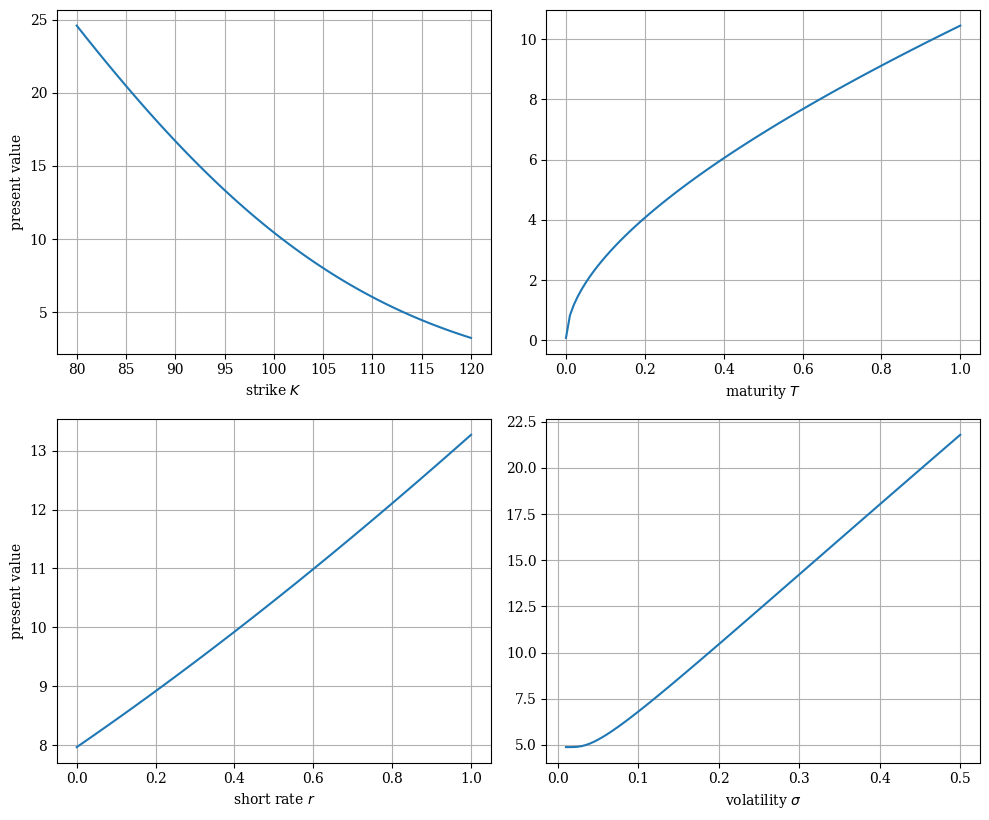

In [81]:
plot_values(BSM_call_value)

## Put Option

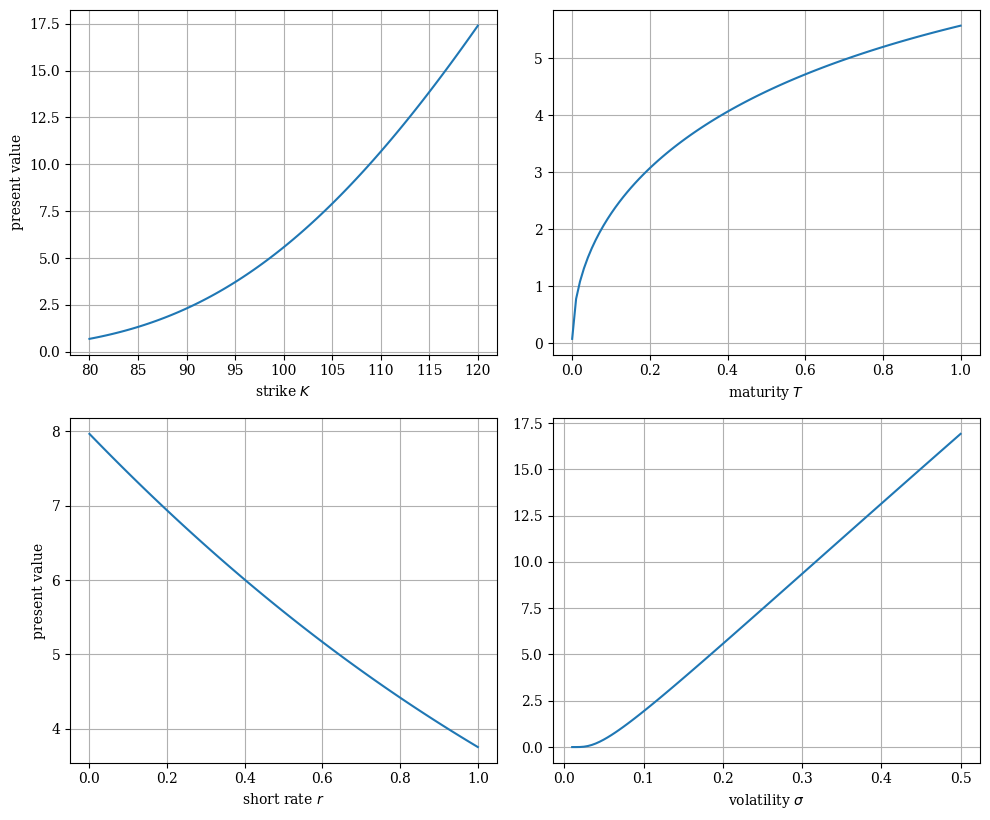

In [82]:
plot_values(BSM_put_value)

## Present Value of an Option at t < T
The present value of the option is always above the (undiscounted) inner value. The difference between the two is generally referred to as the time value of the option. In this sense, the option’s present value is composed of the inner value plus the time value. Time value is suggestive of the fact that the option still has time to get in-the-money or to get even more in-the-money.

In [79]:
import ipywidgets as widgets
from IPython.display import display

def plot_option_values(t):
    """
    Plot option values for a given time to maturity

    Parameters:
    t: time to maturity
    """
    # Model and Option Parameters
    K = 8000 # strike price
    r = 0.025 # constant, risk-less short rate
    vol = 0.2 # constant volatility

    # Sample Data Generation
    S = np.linspace(4000, 12000, 150) # vector of index level values

    # Inner value at maturity
    h = np.maximum(S - K, 0)

    # Calculate call option values
    C = [BSM_call_value(S0, K, 0, t, r, vol) for S0 in S]

    # Graphical Output
    plt.figure(figsize=(10, 6))
    plt.plot(S, h, '-.', c='#0047AB', lw=2.5, label='inner value')
    plt.plot(S, C, 'r', lw=2.5, label='present value')
    plt.axvline(K, c='k', ls='--', label='strike $K$')
    plt.grid(True)
    plt.legend(loc=0)
    plt.xlabel('index level $S_0$')
    plt.ylabel('present value $C(t)$')
    plt.title(f'Black-Scholes-Merton call option value at $t={t:.2f}$')
    plt.show()

# Create interactive widget
def create_time_widget():
    t_widget = widgets.FloatSlider(
        value=1.0,
        min=0.01,
        max=2.0,
        step=0.05,
        description='Time to Maturity:\t',
        continuous_update=False
    )

    interactive_plot = widgets.interactive(plot_option_values, t=t_widget)
    display(interactive_plot)

# Run the interactive widget
create_time_widget()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Time to Maturity:\t', max=2…

---

## Assumptions

The Black-Scholes model makes the following assumptions:

1. The underlying asset follows a geometric Brownian motion with constant drift and volatility.
2. Markets are frictionless (no transaction costs or taxes).
3. The risk-free interest rate is constant and known.
4. The option is European, meaning it can only be exercised at expiration.
5. No dividends are paid by the underlying asset during the option's life.

---

## Applications

The Black-Scholes formula is widely used in:

- **Option pricing**: Determining the fair value of options.
- **Risk management**: Assessing and hedging financial risks.
- **Trading strategies**: Informing decisions in derivatives markets.

---

## Limitations

Despite its usefulness, the Black-Scholes model has limitations:

1. **No dividends**: It does not directly account for dividends, though adjustments can be made.
2. **Volatility assumption**: Assumes constant volatility, which may not reflect real-world market dynamics.
3. **No early exercise**: Not applicable for American-style options without modification.
4. **Perfect markets**: Assumes ideal market conditions, which rarely exist in practice.

---

## Extensions

Several extensions to the Black-Scholes model address its limitations:

- **Black-Scholes-Merton Dividend Model**: Adjusts for dividends.
- **Stochastic Volatility Models**: Accounts for changing volatility.
- **Binomial Trees**: Handles American options and early exercise features.

---

The Black-Scholes formula is a cornerstone of modern financial theory, providing essential insights into option pricing and market behavior.

### Exercies 1.2: Analyze real-world option data (dataset provided) and compare Black-Scholes prices to market prices.

In [148]:
import pandas as pd # for data manipulation
# Get the NIFTY 27 Feb 2025 Expiry Options Chain collected on 23 Jan 2025 when NIFTY Futures was at Rs.23,194.40
# 10% interest rate is applied while computing implied volatility
data = pd.read_csv("option_data.csv")
data.head()

,Strike Price,Call Price,Put Price,Vol
0,23250,553.95,405.00,16.99
1,23300,525.90,426.45,16.94
2,23350,498.70,446.25,16.65
3,23400,470.85,470.05,16.76
4,23450,445.30,492.45,16.71


## Set the Parameters

In [149]:
expiry_date = pd.to_datetime("2025-02-27")
data_date = pd.to_datetime("2025-01-23")
timedelta = expiry_date - data_date
days_to_expiry = timedelta.days
# parameters
T = days_to_expiry / 365
St = 23194.40
r = 0.1

In [150]:
data['BSM Call Price'] = np.nan
data['BSM Put Price'] = np.nan
data['Call Price Difference'] = np.nan
data['Put Price Difference'] = np.nan

for index, row in data.iterrows():
    K = row['Strike Price']
    sigma = row['Vol']/100
    data.at[index, 'BSM Call Price'] = BSM_call_value(St, K, 0, T, r, sigma)
    data.at[index, 'BSM Put Price'] = BSM_put_value(St, K, 0, T, r, sigma)


# Compare Black-Scholes prices with market prices
data["Call Price Difference"] = data["Call Price"] - data["BSM Call Price"]
data["Put Price Difference"] = data["Put Price"] - data["BSM Put Price"]

data

,Strike Price,Call Price,Put Price,Vol,BSM Call Price,BSM Put Price,Call Price Difference,Put Price Difference
0,23250,553.95,405.00,16.99,572.692545,406.412847,-18.742545,-1.412847
1,23300,525.90,426.45,16.94,544.733063,427.976204,-18.833063,-1.526204
2,23350,498.70,446.25,16.65,510.711633,443.477613,-12.011633,2.772387
3,23400,470.85,470.05,16.76,488.906456,471.195276,-18.056456,-1.145276
4,23450,445.30,492.45,16.71,463.340504,495.152162,-18.040504,-2.702162
5,23500,420.70,519.00,16.64,438.014933,519.349431,-17.314933,-0.349431
6,23550,396.50,539.80,16.28,405.228998,536.086336,-8.728998,3.713664
7,23600,371.00,566.05,16.46,388.688896,569.069073,-17.688896,-3.019073
8,23650,347.65,594.00,16.44,367.253250,597.156266,-19.603250,-3.156266
9,23700,326.50,622.60,16.41,346.346135,625.771990,-19.846135,-3.171990


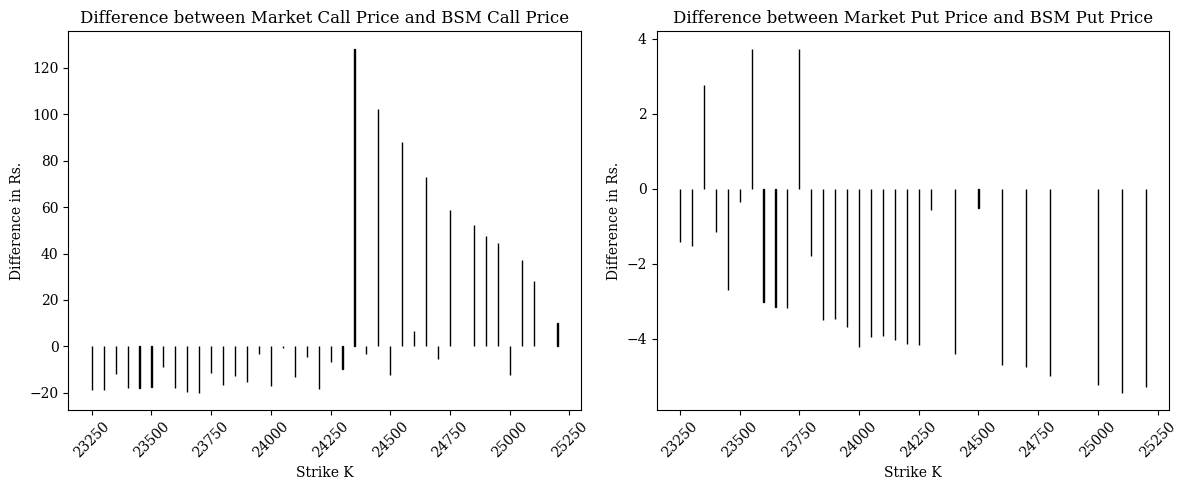

In [157]:
# Visualize results
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
bar_width = 0.5
ax1.bar(data['Strike Price'], data['Call Price Difference'], width=bar_width, edgecolor='black',
        linewidth=1, color='skyblue')
ax1.set_title('Difference between Market Call Price and BSM Call Price')
ax1.set_xlabel('Strike K')
ax1.set_ylabel('Difference in Rs.')
ax1.tick_params(axis='x', rotation=45)

# Second subplot
ax2.bar(data['Strike Price'], data['Put Price Difference'], width=bar_width, edgecolor='black',
        linewidth=1, color='lightgreen')
ax2.set_title('Difference between Market Put Price and BSM Put Price')
ax2.set_xlabel('Strike K')
ax2.set_ylabel('Difference in Rs.')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()